In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

df = pd.read_csv('winequality-red.csv')
df.head()
print(df.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [76]:
plt.figure(figsize = (20, 15))
#df = df.drop('alcohol', axis = 1)
#df = df.drop('quality', axis = 1)
#df = df.drop('density', axis = 1)
#df = df.drop('sulphates', axis = 1)
#df = df.drop('chlorides', axis = 1)
#df = df.drop('pH', axis = 1)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Figure size 2000x1500 with 0 Axes>

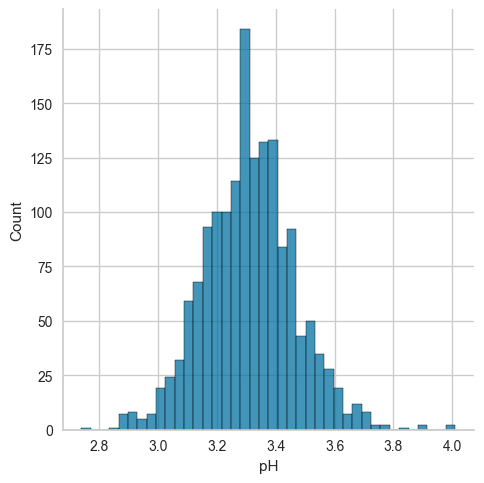

In [82]:
visual = sns.displot(df['pH'])

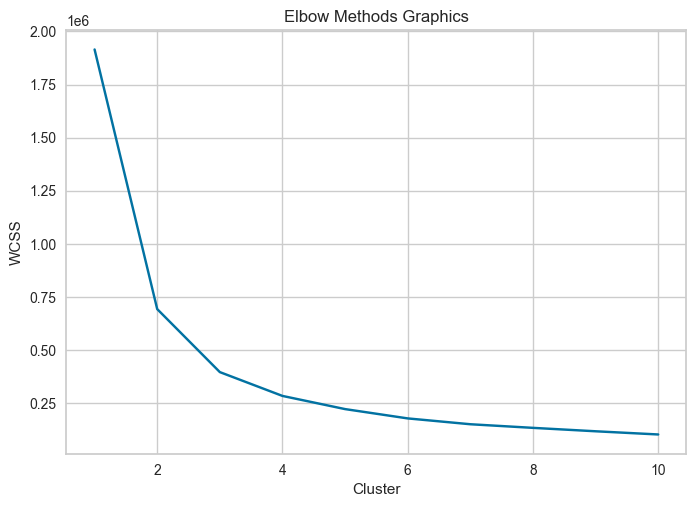

In [77]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Methods Graphics')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

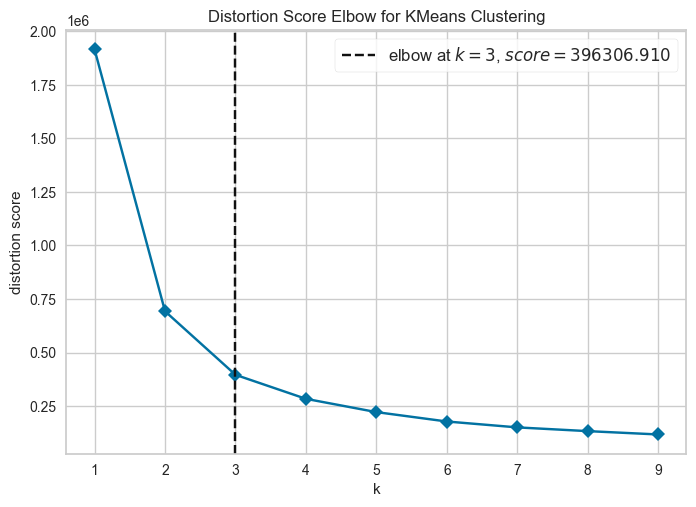

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
model = KMeans()
visible = KElbowVisualizer(model, k=(1,10), timings = False)
visible.fit(df)
visible.show()

In [79]:
bca = PCA()
X = bca.fit_transform(df)
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
graphics = np.unique(label)

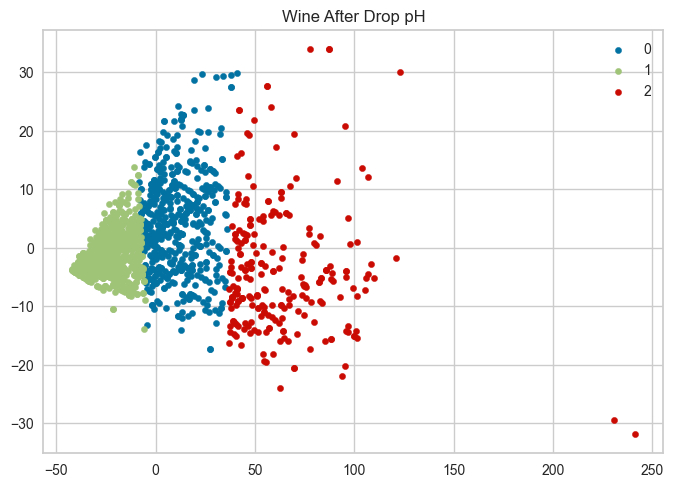

In [80]:
for i in graphics:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('Wine After Drop pH')
plt.show()